In [36]:
import pandas as pd
import numpy as np
import seaborn as sb


train = pd.read_csv(r'E:\Git\ML\Kaggle_Bosch\Data\train_numeric.csv', nrows=200000)
train.rename(columns={'Response':'label'}, inplace=True)

date  = pd.read_csv(r'E:\Git\ML\Kaggle_Bosch\Data\train_date.csv', nrows=200000)
del date['Id']
date.head()
cols = date.columns.values
date = date.join(train, how='inner')
date.head()



,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,label
0,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


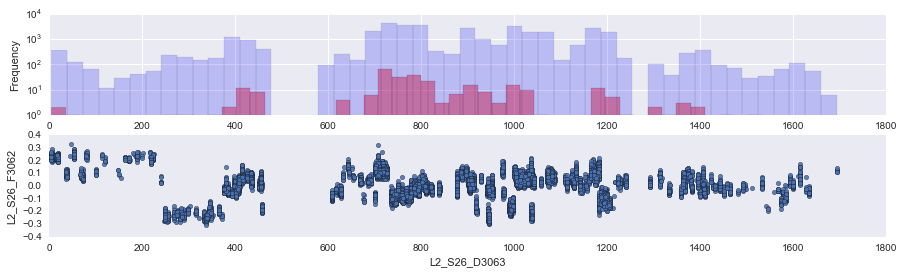

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
def getdate(f):
    return '_'.join(f.split('_')[:2]) + '_D' + str(int(f.split('_')[2].replace('F',''))+1)

top72 = ['L3_S32_F3850','L3_S33_F3855','L1_S24_F1723','L3_S33_F3865','L1_S24_F1846','L1_S24_F1695','L3_S38_F3952','L3_S29_F3407','L1_S24_F1604','L1_S24_F1632','L3_S33_F3859','L1_S24_F1565','L0_S3_F100','L0_S6_F122','L1_S24_F1778','L0_S23_F671','L3_S34_F3882','L0_S5_F116','L0_S18_F439','L0_S0_F20','L0_S1_F28','L3_S30_F3544','L3_S29_F3330','L3_S29_F3342','L1_S24_F1838','L3_S30_F3494','L3_S29_F3351','L1_S24_F1647','L3_S29_F3382','L0_S0_F18','L0_S10_F244','L3_S30_F3809','L3_S29_F3461','L0_S14_F374','L3_S30_F3804','L0_S10_F259','L3_S36_F3920','L3_S29_F3336','L0_S14_F370','L0_S11_F294','L0_S10_F219','L0_S2_F60','L2_S26_F3073','L3_S30_F3574','L3_S30_F3609','L0_S6_F132','L0_S2_F44','L0_S19_F455','L3_S30_F3769','L0_S17_F433','L3_S33_F3857','L3_S30_F3689','L3_S29_F3479','L0_S0_F2','L2_S26_F3121','L3_S30_F3754','L2_S27_F3129','L2_S27_F3140','L3_S29_F3373','L0_S13_F356','L2_S27_F3210','L2_S27_F3133','L2_S27_F3144','L0_S12_F350','L0_S0_F10','L0_S7_F138','L0_S15_F418','L3_S30_F3554','L3_S29_F3327','L0_S9_F165','L0_S15_F403','L2_S26_F3047','L2_S26_F3036','L2_S26_F3062']
top72 = ['L2_S26_F3062']
datefeats = date.columns.values
for c in top72[-20:]:
    try:
        
        
        featureName = c
        c = getdate(featureName)
        
        if c not in datefeats:
            continue
        _, ax = plt.subplots(2,1, figsize=(15,4))
        ax[0].set_xlim(0,1800)
        ax[1].set_xlim(0,1800)
        

        
        date[date['label']==1][c].plot.hist(bins=50, color='r', ax=ax[0], alpha=0.4, log=True)
        date[date['label']==0][c].hist(bins=50, color='b', ax=ax[0], alpha=0.2, log=True)
        date[[c,featureName]].plot.scatter(x=c, y=featureName, ax=ax[1], secondary_y=True, alpha=0.9)
        #date[date['Response']==1][c].plot.hist(bins=50, ax=ax, alpha=0.4, log=True)
        plt.show()
        
    except ValueError:
        continue

In [42]:
tsIndex = {}
import gc
def createTsIndex(train, features):
    for f in features:
        if '_F' not in f:
            continue
        
        d = getdate(f)
        if d not in datefeats:
            print('No date exists for {} {}'.format(f, d))
            continue

        print('Creating TS features for {} {}'.format(f,d))

        temp = train[[d,'label']]                
        temp['ts'] = np.floor((temp[d]*10).values)

        groups = pd.groupby(temp[['ts','label']], by=['ts']).sum().reset_index()
        groups.rename(columns={'label': f+'_TS'}, inplace=True)
        #groups has f_TS, ts, temp has ts, d, label

        temp = pd.merge(temp, groups, on=['ts'])[[d,f+'_TS']]
        # temp has d, f_TS

        tsIndex[d] = temp.drop_duplicates().set_index(d)
    
    gc.collect()

createTsIndex(date, ['L2_S26_F3062'])

Creating TS features for L2_S26_F3062 L2_S26_D3063


C:\Users\serajago.FAREAST\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count    6174.000000
mean        1.340136
std         1.220652
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        14.000000
Name: L2_S26_F3062_TS, dtype: float64


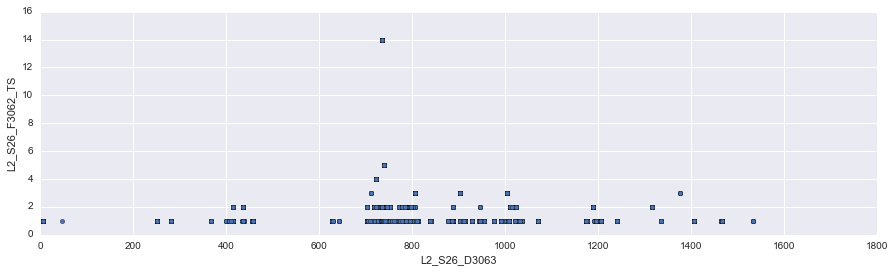

In [60]:
_,ax = plt.subplots(1,1,figsize=(15,4))
ax.set_xlim(0,1800)
date2 = date.join(tsIndex['L2_S26_D3063'], on=['L2_S26_D3063'])
date2['L2_S26_F3062_TS'].replace(0, np.nan, inplace=True)
print(date2['L2_S26_F3062_TS'].describe())
date2.plot.scatter(x='L2_S26_D3063',y='L2_S26_F3062_TS', ax=ax)
#print(tsIndex['L2_S26_D3063'].describe())

In [31]:
import pickle
x = pickle.load(open(r'E:\temp\train.pkl', 'rb'))
date = date.merge(x[['Id','Response']], on=['Id'])
date.rename(columns={'Response' : 'label'}, inplace=True)
date.head()

,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,...,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response_x,Response_y,Response_x,Response_y
0,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [24]:
y = date[['Id', 'L2_S26_D3063']].merge(x[['L2_S26_F3062_TS', 'Id']], on='Id')

y.describe()

,Id,L2_S26_D3063,L2_S26_F3062_TS
count,200000.000000,36772.000000,108.000000
mean,200029.947135,869.369542,0.129630
std,115402.589920,264.987210,0.388926
min,4.000000,4.990000,0.000000
25%,100148.500000,739.390000,0.000000
50%,200353.000000,839.705000,0.000000
75%,299819.500000,1039.770000,0.000000
max,399899.000000,1693.440000,2.000000


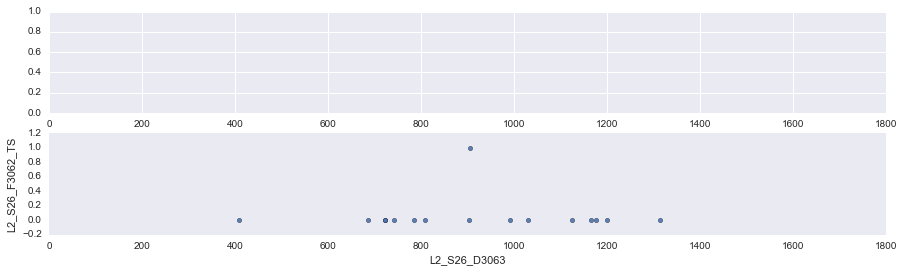

In [23]:
_, ax = plt.subplots(2,1, figsize=(15,4))
ax[0].set_xlim(0,1800)
ax[1].set_xlim(0,1800)

y.plot.scatter(x='L2_S26_D3063', y='L2_S26_F3062_TS', ax=ax[1], secondary_y=True, alpha=0.9)
plt.show()

In [34]:
#date[['L1_S25_F2797','L1_S25_D2798']].plot.scatter(y='L1_S25_F2797',x='L1_S25_D2798')
f = 'L2_S27_F3170'
d = 'L2_S27_D3171'
f = 'L1_S25_F2797'
d = 'L1_S25_D2798'
f = 'L2_S28_F3307'
d = 'L2_S28_D3308'
d = 'L1_S24_D1817'
f = 'L1_S24_F1816'
d = 'L2_S26_D3063'
f = 'L2_S26_F3062'
temp = date[['Id',d,'Response_x']]

temp.rename(columns={d : 'ts'}, inplace=True)
temp['ts'] = np.floor((temp['ts']*10).values)

groups = pd.groupby(temp[['ts','Response_x']], by=['ts']).sum().reset_index()

groups.rename(columns={'Response_x': f+'_TS'}, inplace=True)

temp = pd.merge(temp, groups, on=['ts'])[['Id',f+'_TS']]

temp.head()


C:\Users\serajago.FAREAST\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:2748: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
C:\Users\serajago.FAREAST\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Id,L2_S26_F3062_TS,L2_S26_F3062_TS
0,16,0,0
1,5586,0,0
2,9240,0,0
3,66465,0,0
4,68151,0,0


KeyboardInterrupt: 

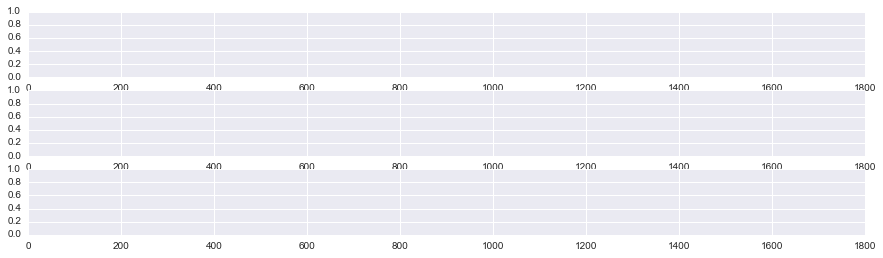

In [35]:
date2 = date.merge(temp, on=['Id'], how='left')

_, ax = plt.subplots(3,1, figsize=(15,4))
ax[0].set_xlim(0,1800)
ax[1].set_xlim(0,1800)
ax[2].set_xlim(0,1800)

#ax[1].set_ylim(0,10**4)

date2[date2[f+'_TS']>0][[d,f+'_TS']].plot.scatter(x=d,y=f+'_TS',ax=ax[0], color='r', alpha=0.4)
date2[[d,f]].plot.scatter(x=d, y=f, ax=ax[2], color='b', alpha=0.4)

date2[date2['label']==1][d].plot.hist(bins=50, color='r', ax=ax[1], alpha=0.4, log=True)
date2[date2['label']==0][d].hist(bins=50, color='b', ax=ax[1], alpha=0.2, log=True)